In [73]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install plotly
!pip install polars
!pip install scikit-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 9.4 MB/s eta 0:00:00


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import polars as pl
import seaborn as sns

Neste notebook, utilizaremos o conjunto de dados da Steam - disponível em https://www.kaggle.com/datasets/fronkongames/steam-games-dataset - e vamos criar um modelo para prever o preço de um novo jogo, com base nas variáveis disponíveis.

In [4]:
df = pd.read_csv('./data/games.csv')
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [71]:
print('Origem dos dados: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset')
print('Nome: Steam Games Dataset')
print('Tamanho: ', df.size)
print('Quantidade de linhas: ', len(df))
print('Linhas x Colunas: ', df.shape)
print('Dados faltantes: ', df.isna().sum())

Origem dos dados: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset
Nome: Steam Games Dataset
Tamanho:  3319017
Quantidade de linhas:  85103
Linhas x Colunas:  (85103, 39)
Dados faltantes:  AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Header image                      0
Website                       45651
Support url                   43517
Support email                 13596
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Pos

Utilizaremos apenas variáveis numéricas, formataremos a data para um formato numérico, e utilizaremos o máximo da quantidade estimada de jogadores que possuem o jogo.

In [33]:
x = df[['Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'DLC count', 'Average playtime two weeks']]
x['Release date'] = pd.to_numeric(pd.to_datetime(x['Release date'], errors='coerce'))
x['Estimated owners'] = x['Estimated owners'].apply(lambda x: x.split(' - ')[1])
y = df['Price']

/tmp/ipykernel_157035/1572162457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Release date'] = pd.to_numeric(pd.to_datetime(x['Release date'], errors='coerce'))
/tmp/ipykernel_157035/1572162457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Estimated owners'] = x['Estimated owners'].apply(lambda x: x.split(' - ')[1])


In [34]:
x

,Release date,Estimated owners,Peak CCU,Required age,DLC count,Average playtime two weeks
0,1224547200000000000,20000,0,0,0,0
1,1507766400000000000,20000,0,0,0,0
2,1637107200000000000,20000,0,0,0,0
3,1595462400000000000,20000,0,0,0,0
4,1580688000000000000,20000,0,0,0,0
...,...,...,...,...,...,...
85098,1704153600000000000,0,0,0,0,0
85099,1704240000000000000,0,0,0,0,0
85100,1704326400000000000,0,0,0,0,0
85101,1704672000000000000,0,0,0,0,0


<Axes: >

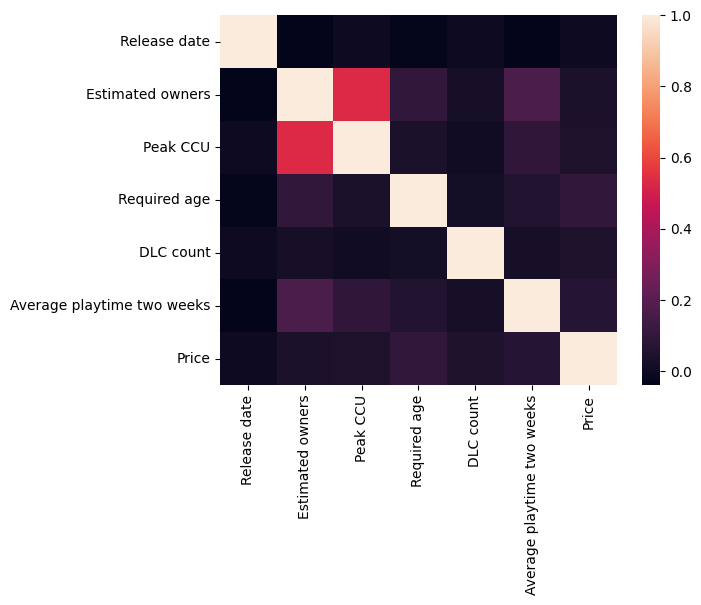

In [80]:
df_numeric = pd.concat([x, y], axis=1)
sns.heatmap(df_numeric.corr())

É possível notar que há poucas redundâncias entre as variáveis, e a correlação de nosso y com as outras variáveis é baixa.

In [6]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
pred_1 = lr.predict(x_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
mean_absolute_error(y_test, pred_1)

6.418702035060159

In [42]:
mean_squared_error(y_test, pred_1) ** 0.5

13.476037813777658

In [43]:
r2_score(y_test, pred_1)

0.0026564921078677806

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_2 = rfr.predict(x_test)

In [47]:
rfr.predict(x_test)

array([ 8.79      ,  6.32234811,  9.6067    , ..., 12.2719    ,
        0.        ,  7.23513125])

In [48]:
mean_absolute_error(y_test, pred_2)

5.770383266772463

In [49]:
mean_squared_error(y_test, pred_2) ** 0.5

13.276774724623609

In [50]:
r2_score(y_test, pred_2)

0.03193282173944012

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_3 = gbr.predict(x_test)

In [54]:
gbr.predict(x_test)

array([ 4.71747229,  6.9991653 , 11.38397934, ..., 13.01119891,
        1.6224339 ,  7.02565619])

In [55]:
mean_absolute_error(y_test, pred_3)

5.436284700493474

In [56]:
mean_squared_error(y_test, pred_3) ** 0.5

12.77881827296941

In [57]:
r2_score(y_test, pred_3)

0.10318737940487954

In [63]:
print('Modelo linear: ' + f'{mean_absolute_error(y_test, pred_1)}\n',
      'Modelo Random Forest: ' + f'{mean_absolute_error(y_test, pred_2)}\n',
      'Modelo Gradient Boosting: ' + f'{mean_absolute_error(y_test, pred_3)}\n')

Modelo linear: 6.418702035060159
 Modelo Random Forest: 5.770383266772463
 Modelo Gradient Boosting: 5.436284700493474



É possível concluir que nosso modelo de Gradient Boosting obteve a melhor performance para fazer a predição de valores.